The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('diabetes (1).csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


from the given dataset we can see that there is no null values and the duplicate rows in the data

In [ ]:
#visulaization
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


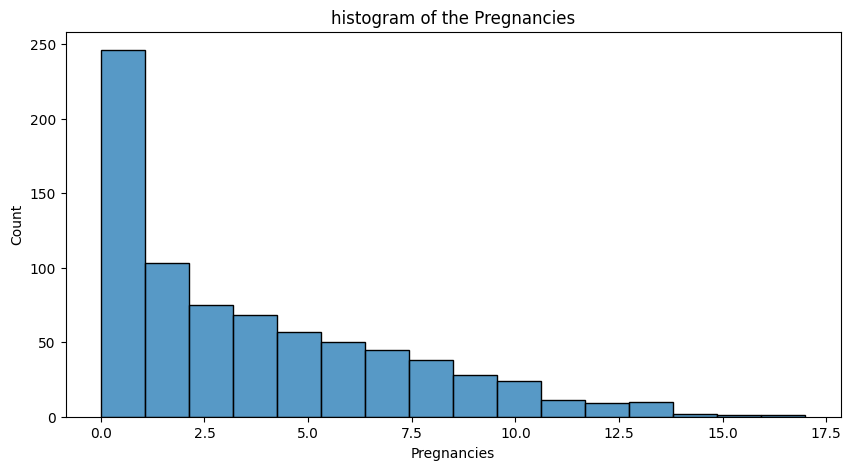

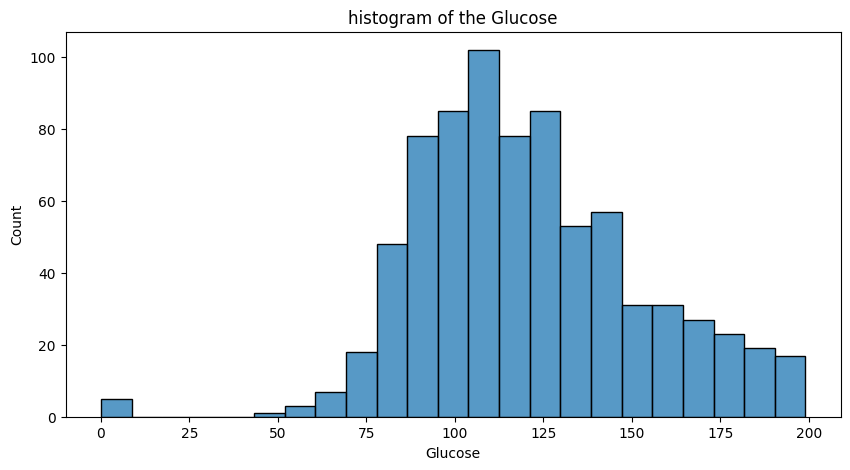

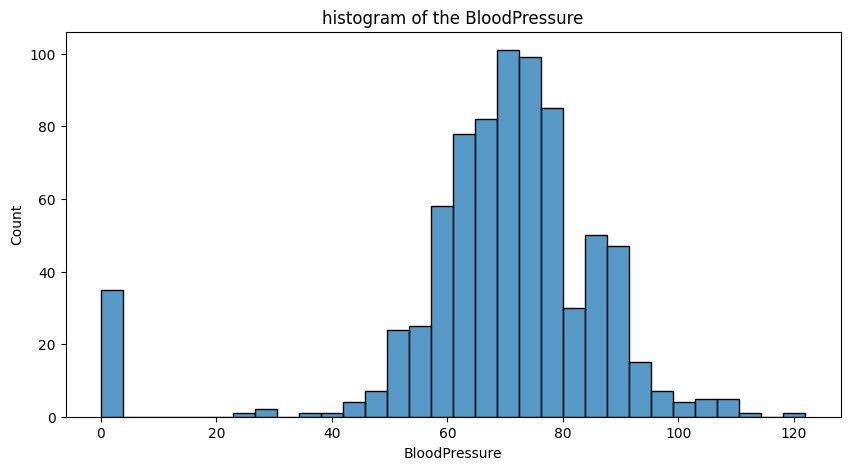

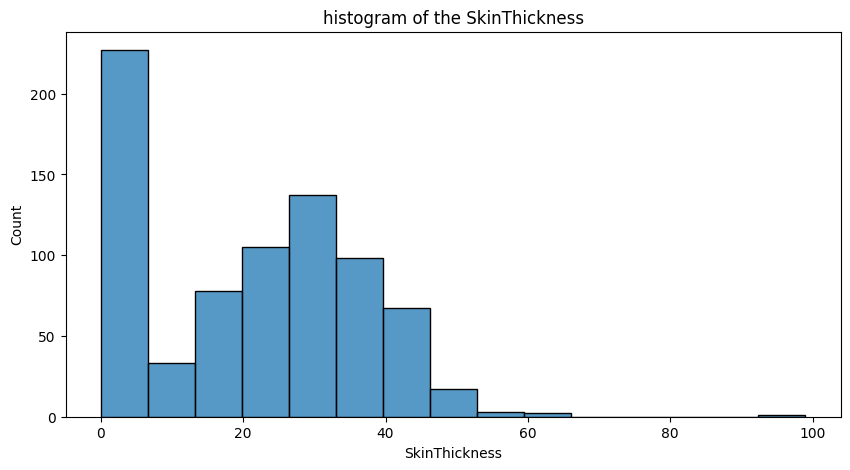

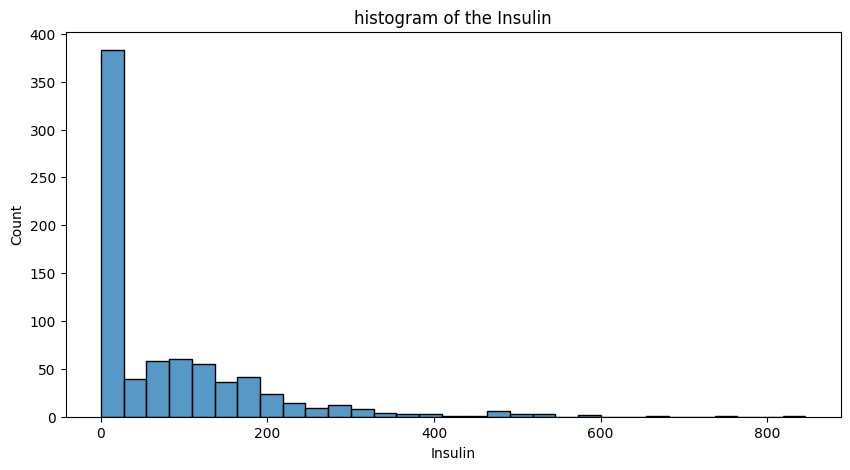

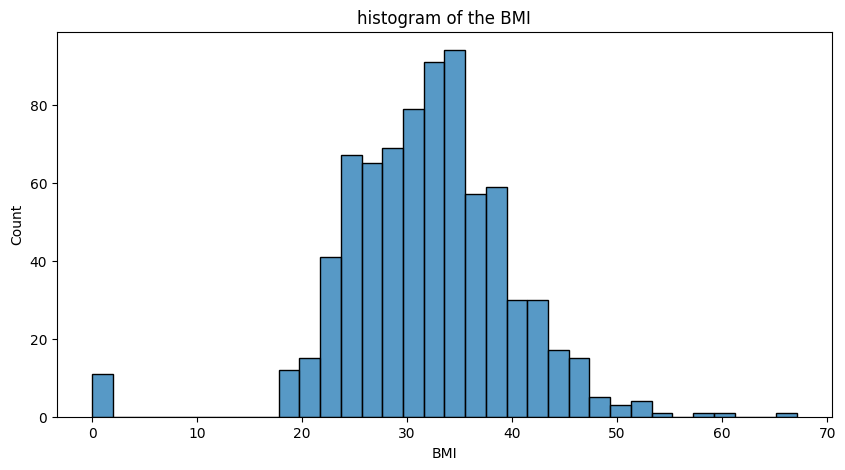

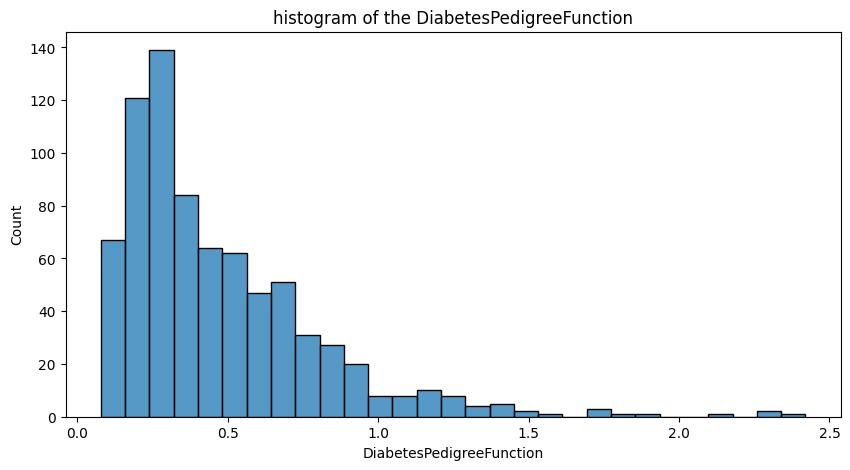

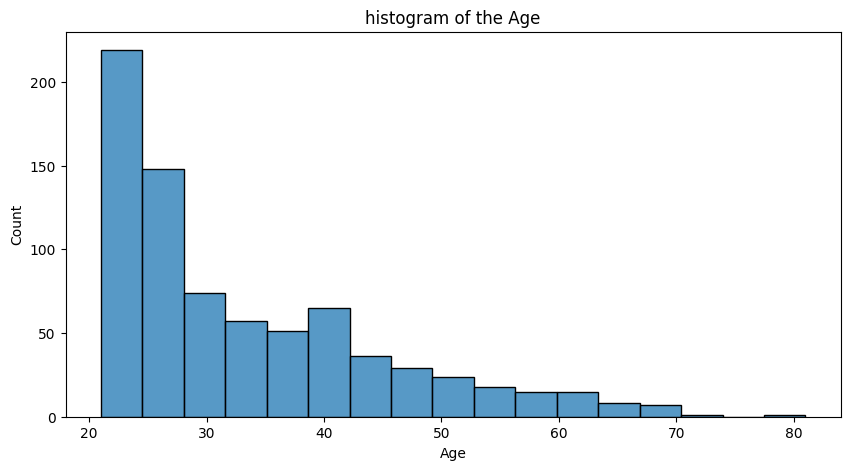

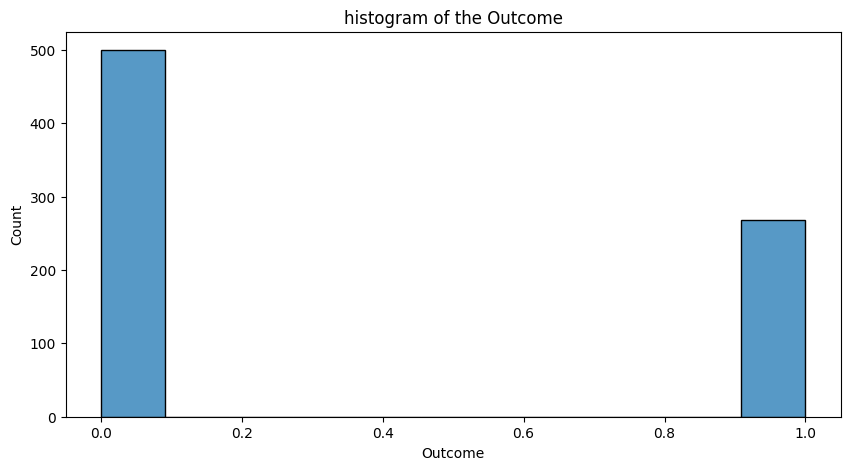

In [ ]:
for col in data.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(data[col])
  plt.title(f"histogram of the {col}")
  plt.show()

From the above histogram we can see that all the features are in continous data expect outcome feature

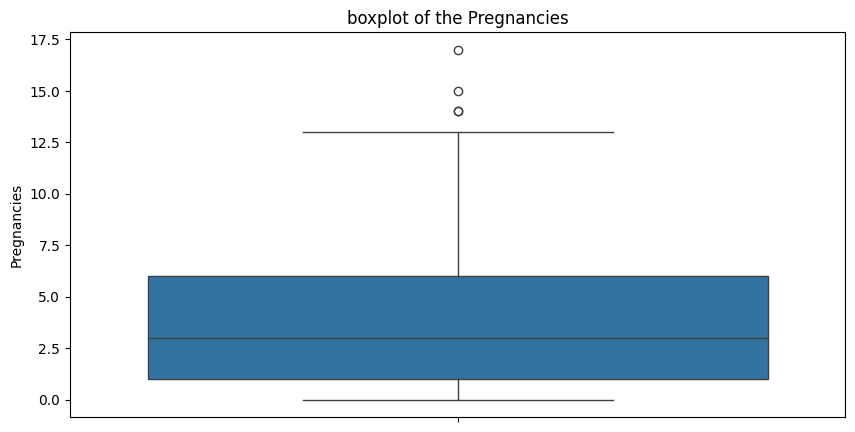

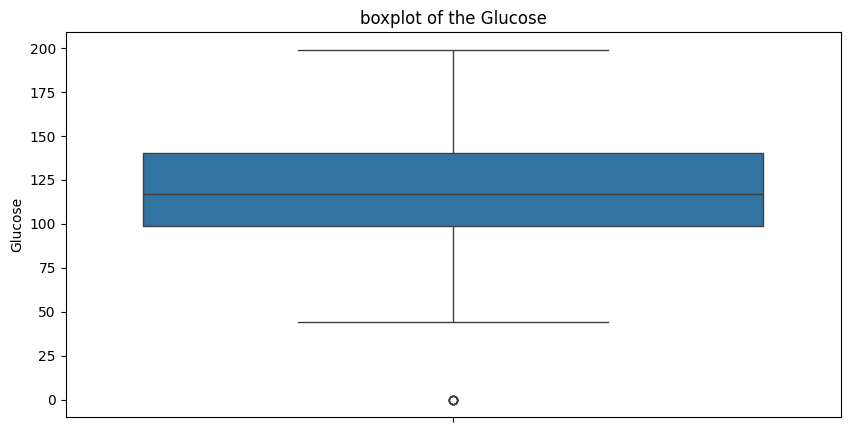

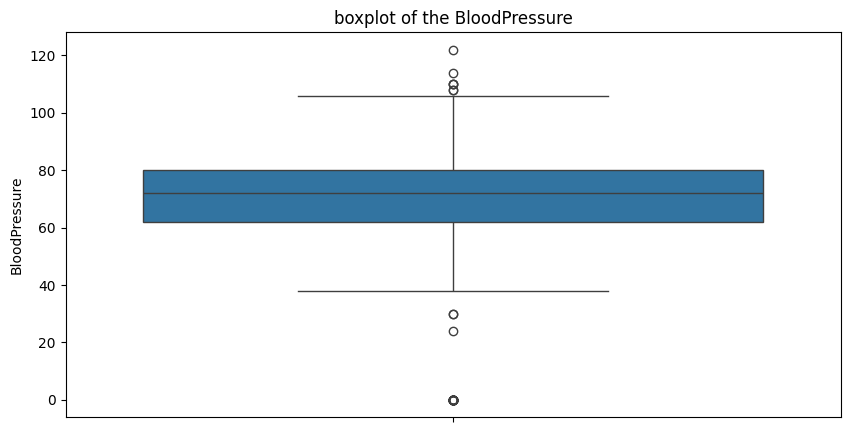

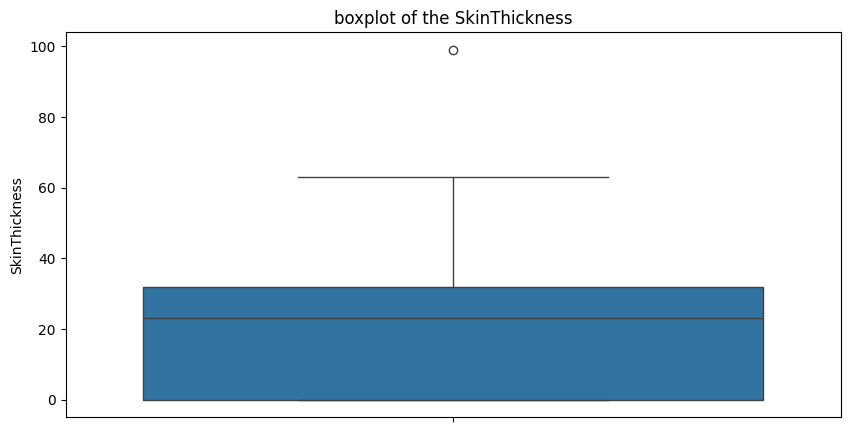

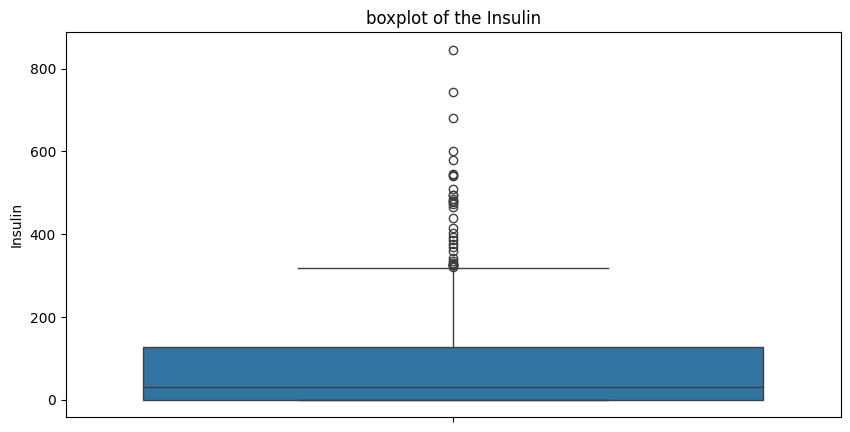

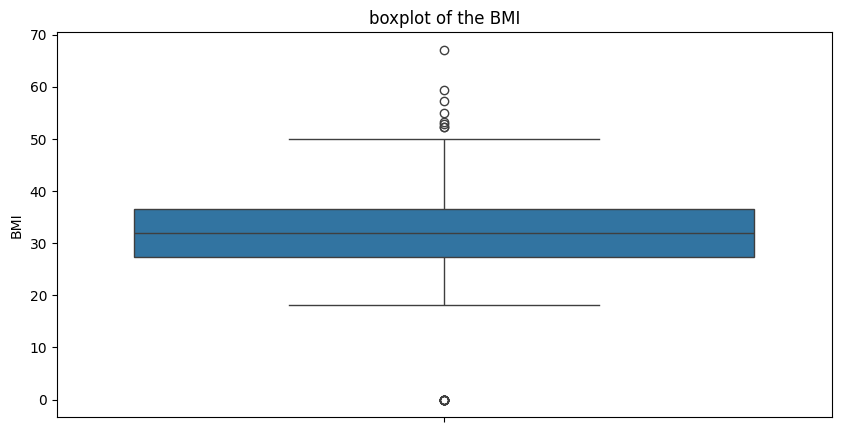

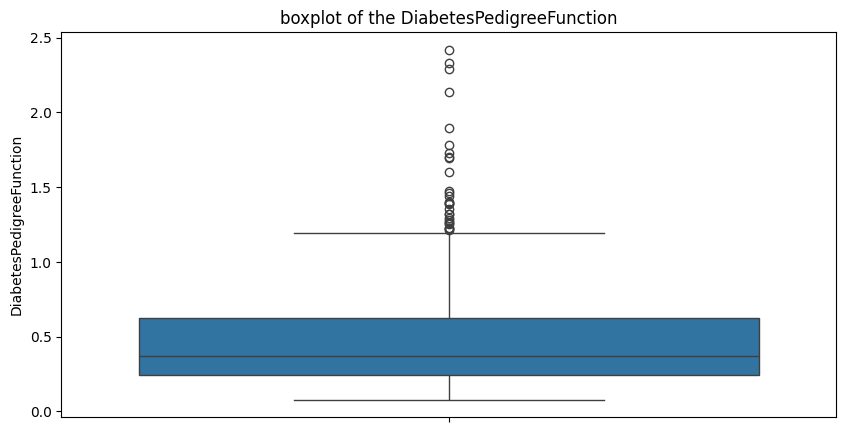

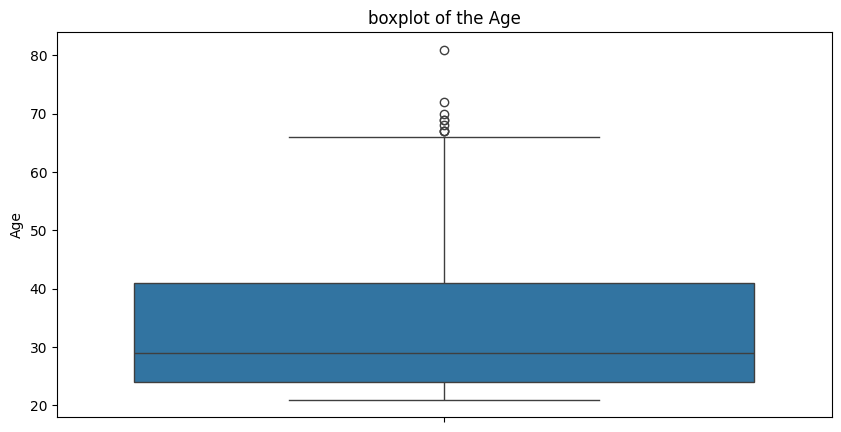

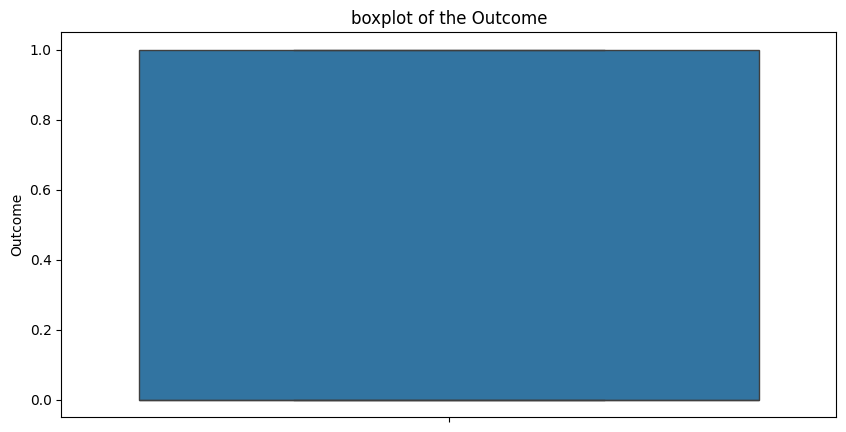

In [ ]:
#boxplot
for col in data.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[col])
  plt.title(f"boxplot of the {col}")
  plt.show()

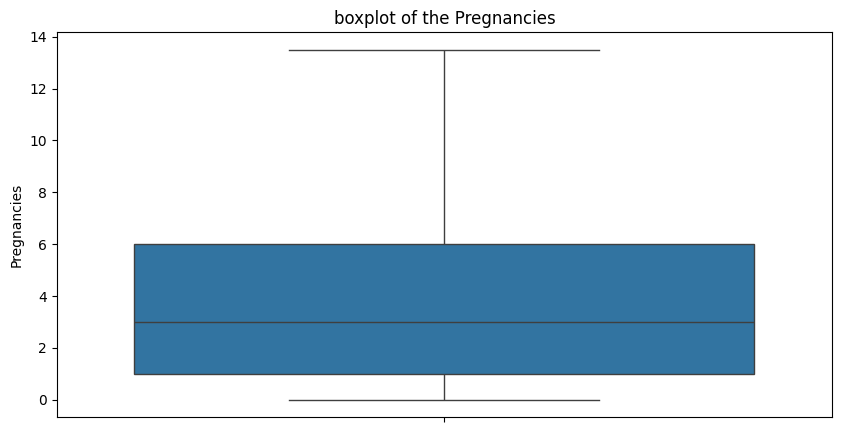

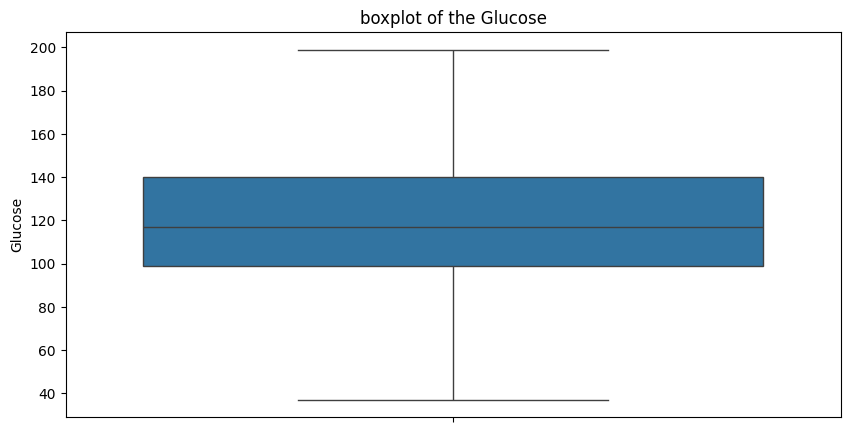

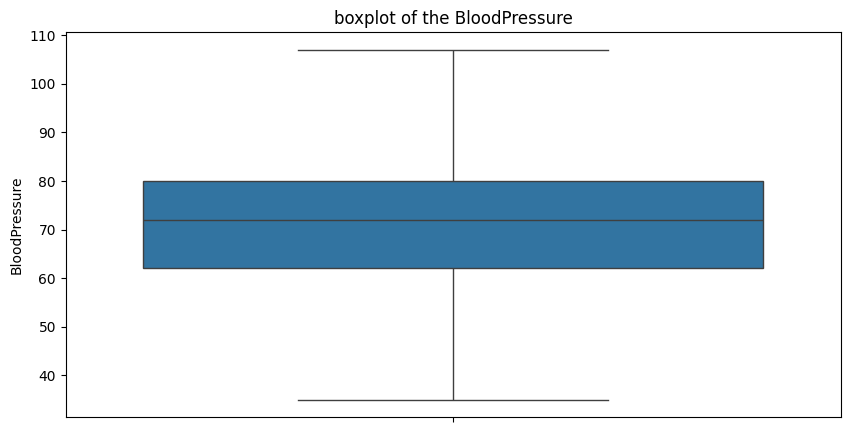

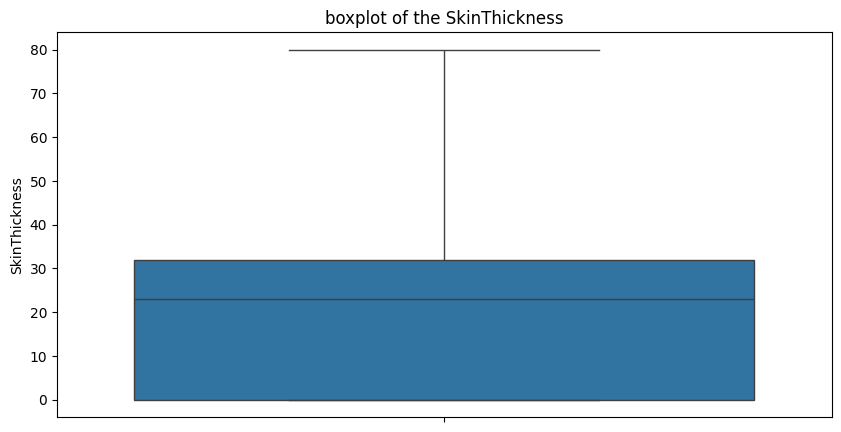

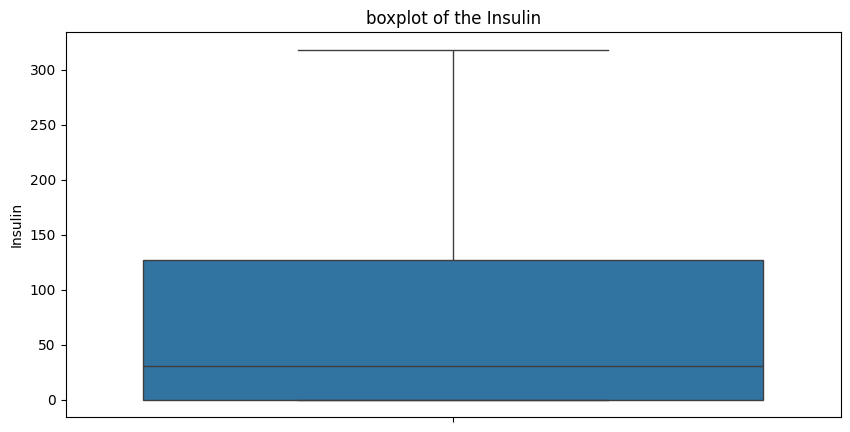

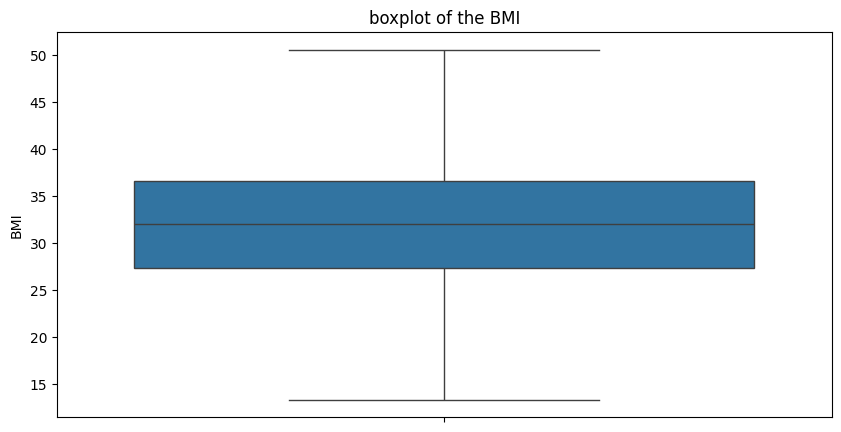

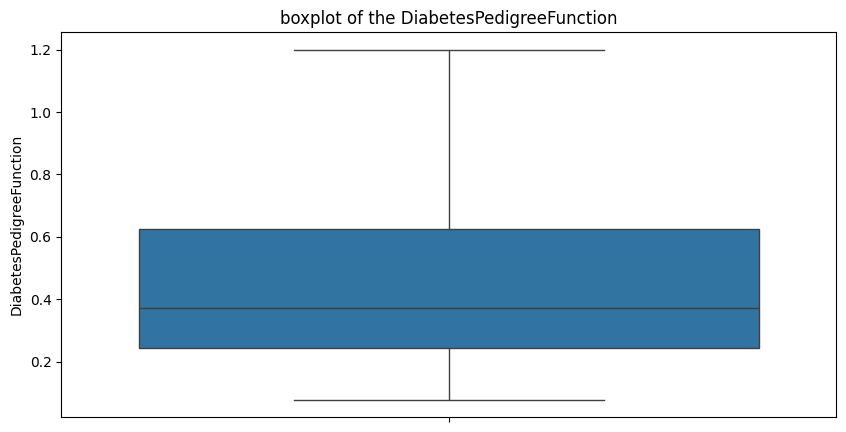

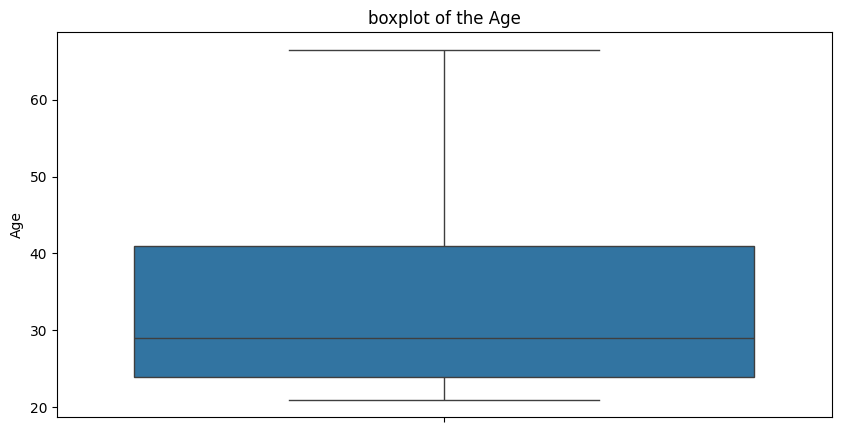

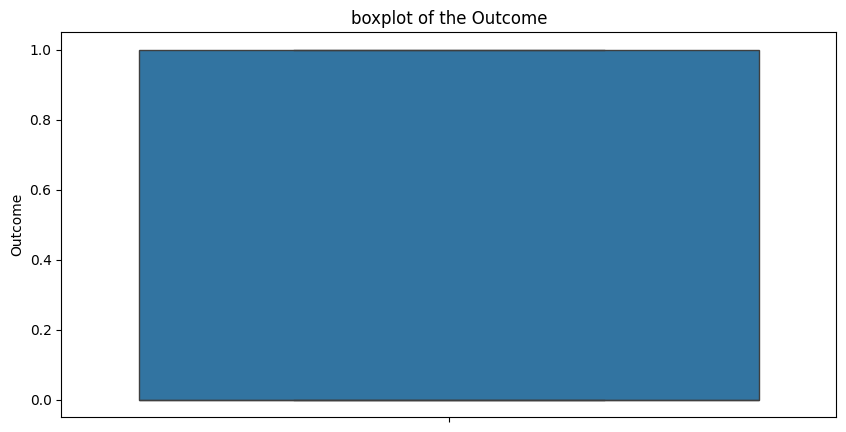

In [ ]:
#treating outliers
for col in data.columns:
  q1=data[col].quantile(0.25)
  q2=data[col].quantile(0.75)
  iqr=q2-q1
  uw=q2+1.5*iqr
  lw=q1-1.5*iqr
  data[col]=np.where(data[col]>uw,uw,np.where(data[col]<lw,lw,data[col]))
  plt.figure(figsize=(10,5))
  sns.boxplot(data[col])
  plt.title(f"boxplot of the {col}")
  plt.show()

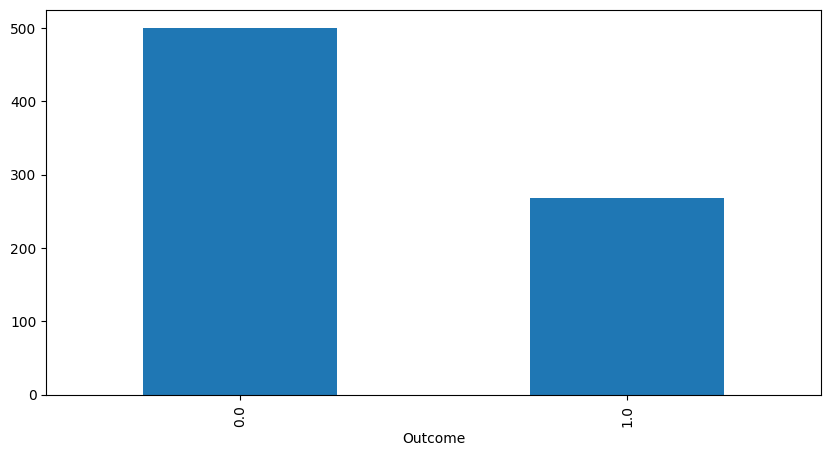

In [ ]:
#barplot
plt.figure(figsize=(10,5))
data['Outcome'].value_counts().plot(kind='bar')
plt.show()

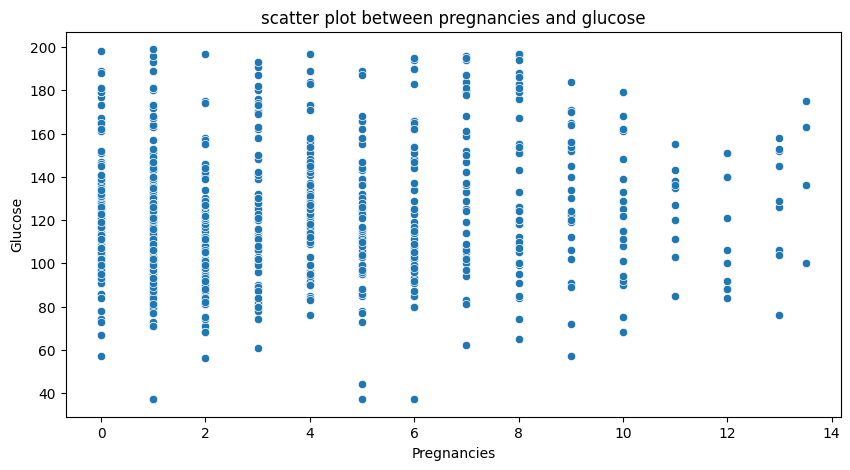

In [ ]:
#scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['Pregnancies'], y=data['Glucose'])
plt.title('scatter plot between pregnancies and glucose')
plt.show()

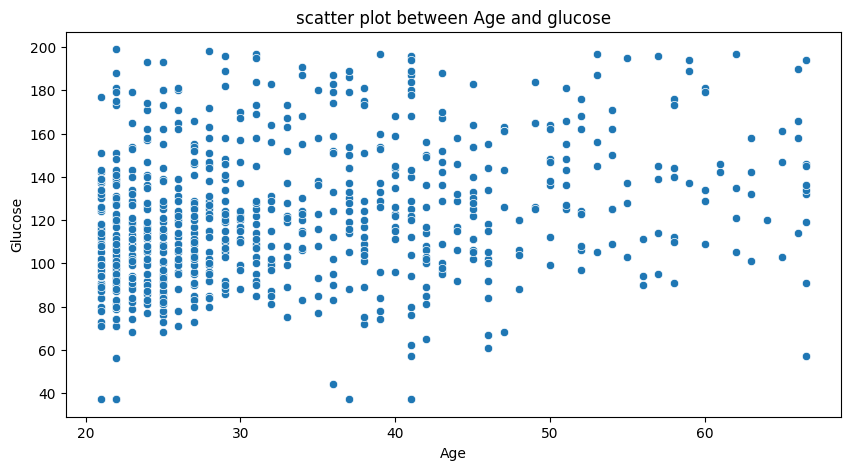

In [ ]:
#scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['Age'], y=data['Glucose'])
plt.title('scatter plot between Age and glucose')
plt.show()

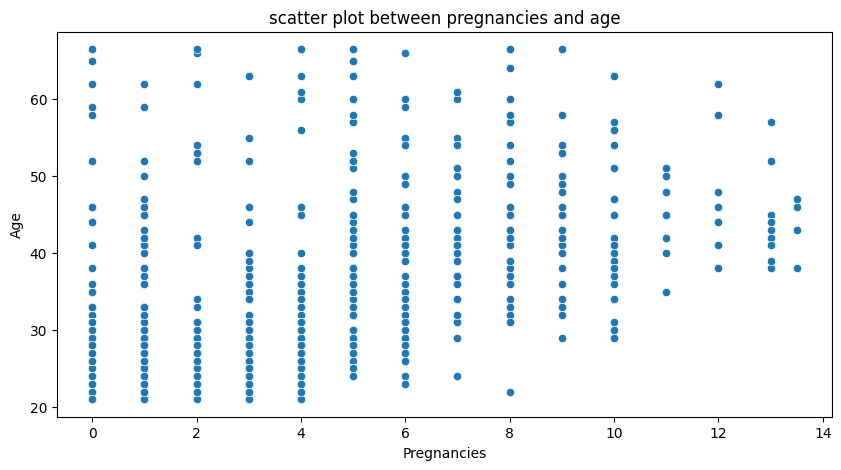

In [ ]:
#scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['Pregnancies'], y=data['Age'])
plt.title('scatter plot between pregnancies and age')
plt.show()

Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.


From the given data diabetes we can see that there is no missing values so we dont use any imputation for filling the null values. And the categorical column(Outcome) is already encoded with 0 and 1 so we are not perfroming any encoding techniques. And for tree based methods we are not applying any preprocessing methods.

Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop('Outcome',axis=1)
y=data['Outcome']


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
y

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print("accuracy score :",accuracy_score(y_test,y_pred))
print("precision score :",precision_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("recall score :",recall_score(y_test,y_pred))

accuracy score : 0.7207792207792207
precision score : 0.5909090909090909
f1 score : 0.6446280991735537
recall score : 0.7090909090909091


In [45]:
#lgbm

from lightgbm import LGBMClassifier
model_lgbm=LGBMClassifier()
model_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [47]:
y_pred_lgbm=model_lgbm.predict(X_test)

In [48]:
y_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0.])

In [49]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print("accuracy score :",accuracy_score(y_test,y_pred))
print("precision score :",precision_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("recall score :",recall_score(y_test,y_pred))

accuracy score : 0.7207792207792207
precision score : 0.5909090909090909
f1 score : 0.6446280991735537
recall score : 0.7090909090909091


In [50]:
#lgbm tunning
from sklearn.model_selection import RandomizedSearchCV

lgb_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
}

lgb_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=lgb_params,
    cv=5,
    scoring='f1',
    n_iter=10,
    random_state=42
)

lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
#xgb boost tunning
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'gamma': [0, 0.1, 0.2]
}

xgb_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=xgb_params,
    cv=5,
    scoring='f1',
    n_iter=10,
    random_state=42
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
y_pred_best_lgb = best_lgb.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Tuned LightGBM Results:",(y_test,y_pred_best_lgb))

print("Tuned XGBoost Results:",(y_test,y_pred_best_xgb))


[LightGBM] [Warning] Unknown parameter: gamma
Tuned LightGBM Results: (668    0.0
324    0.0
624    0.0
690    0.0
473    0.0
      ... 
355    1.0
534    0.0
344    0.0
296    1.0
462    0.0
Name: Outcome, Length: 154, dtype: float64, array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0.]))
Tuned XGBoost Results: (668    0.0
324    0.0
624    0.0
690    0.0
473    0

In [51]:
from sklearn.metrics import roc_auc_score

def get_metrics(y_test, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
y_proba_lgb = model_lgbm.predict_proba(X_test)[:, 1]
y_proba_xgb = model.predict_proba(X_test)[:, 1]

results = pd.DataFrame({
    "LightGBM": get_metrics(y_test, y_pred_lgbm, y_proba_lgb),
    "XGBoost": get_metrics(y_test, y_pred, y_proba_xgb)
})

results


,LightGBM,XGBoost
Accuracy,0.720779,0.720779
Precision,0.590909,0.590909
Recall,0.709091,0.709091
F1 Score,0.644628,0.644628
ROC-AUC,0.753535,0.753535


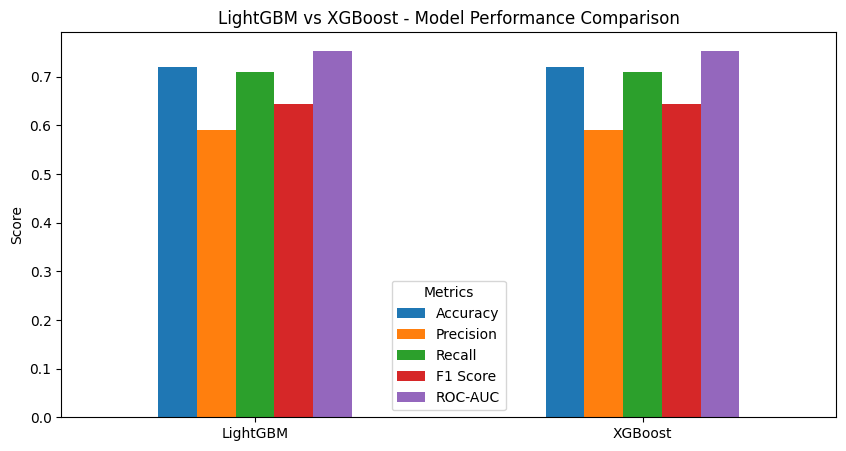

In [52]:
#visulaization

results.T.plot(kind='bar', figsize=(10, 5))
plt.title("LightGBM vs XGBoost - Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


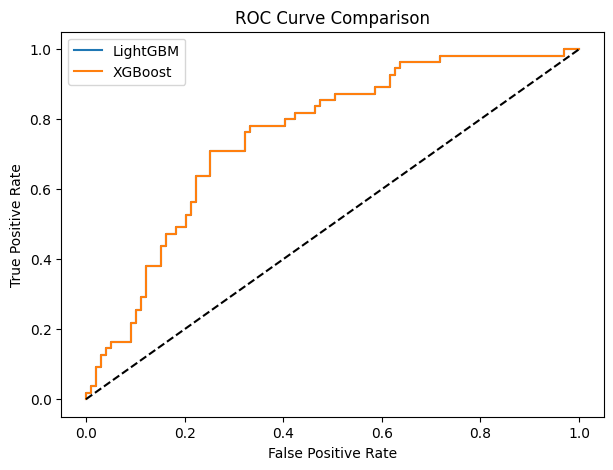

In [54]:
from sklearn.metrics import roc_curve

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(7,5))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Conculsion : we have given a dataset named as diabates. from the given dataset we dont have any msiing values and any duplicated rows in the data.

from histogram plot we can see that the all the columns are the continous data expexct the Outcome column because it contains 0 and 1.

from the boxplot we get to know that there are any outliers in the given data. if we found any outliers in the data we will treat outliers with quantile method

And the categorical column(Outcome) is already encoded with 0 and 1 so we are not perfroming any encoding techniques. And for tree based methods we are not applying any preprocessing methods.

By using sklearn library we built the model with testsize 20 by dividing the data into independent and dependent then we import xgbclassifier from xgboost and lgbmclassifier from lightgbm and then we built the model and train the model with test data then we check the accuracy scores of the both model. here the accuracy of both the model is 0.72

for better model perfromance we tuned the xgboost and lightgbm and then we calculated the recall,f1,accuracy,precision and auc_roc score of the both the models. and finally we visulalized the model comparsion by roc curve.
[ ]
